In [2]:
import datetime, os, pprint, re, sys, time, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
old = pd.read_csv('classifier_training_data_V1.txt.gz', sep = '\t', low_memory=False)
new = pd.read_csv('classifier_training_data_V1_V2.maf.gz', sep = '\t', low_memory=False)

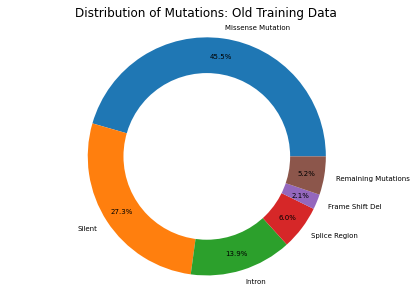

In [15]:
dic = dict(old.Variant_Classification.value_counts())

import itertools
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'Remaining Mutations' if (dic[k]<140) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

x = [label.replace('_',' ') for label in newdic.keys()]
ax.pie(sizes,labels=x, autopct='%1.1f%%', shadow=False,pctdistance=.85, textprops={'fontsize': 7})

center_circle = plt.Circle((0,0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

ax.axis('equal')
plt.tight_layout()
plt.title("Distribution of Mutations: Old Training Data")
fig.savefig('old_training_pie.png', dpi = 500, bbox_inches = 'tight')

ValueError: 'label' must be of length 'x'

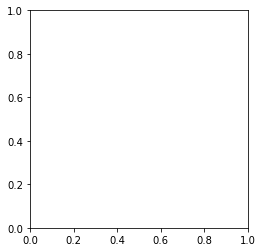

In [16]:
dic = dict(new.Variant_Classification.value_counts())

import itertools
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'Remaining Mutations' if (dic[k]<130) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

x = [label.replace('_',' ') for label in newdic.keys()]
fig, ax = plt.subplots()
ax.pie(sizes,labels=x,autopct='%1.1f%%',shadow=False,pctdistance=.85,textprops={'fontsize': 7})

center_circle = plt.Circle((0,0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

ax.axis('equal')
plt.tight_layout()

plt.title("Distribution of Mutations: New Training Data")
fig.savefig('new_training_pie.png', dpi = 500, bbox_inches = 'tight')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from colour import Color

fig, ax = plt.subplots()

new = pd.read_csv('classifier_training_data_V2.maf.gz', sep = '\t', low_memory=False)
newdic = dict(new.Variant_Classification.value_counts())

x = [label.replace('_',' ') for label in newdic.keys()]
y = newdic.values()

red = Color("red")
colors = list(red.range_to(Color("green"),len(x)))
colors = [color.rgb for color in colors]

plt.bar(x, y, color=colors)
plt.xlabel('Mutation Types', labelpad=12)
plt.xticks(rotation=90)
plt.ylabel('Count', labelpad=12)
plt.yscale("log")
plt.tight_layout()
plt.title("Distribution of Mutations: New Training Data")
fig.savefig('new_training_dist.jpg', dpi = 1500, bbox_inches = 'tight')

In [32]:
dict(new.Variant_Classification.value_counts())

{'Missense_Mutation': 3095,
 'Silent': 1857,
 'Intron': 944,
 'Splice_Region': 408,
 'Frame_Shift_Del': 140,
 'Nonsense_Mutation': 139,
 'Splice_Site': 49,
 'In_Frame_Del': 43,
 'Frame_Shift_Ins': 42,
 "5'UTR": 35,
 "3'UTR": 32,
 'In_Frame_Ins': 9,
 'Translation_Start_Site': 5}

In [ ]:
s = sum(dic.values())
for k, v in dic.items():
    pct = v * 100.0 / s
    print(k, pct)